# Simple Example

Let's have a look at the different [PlantUML](https://plantuml.com/) diagrams that the `cwl2puml` APIs are able to generate, given, for example, the [conditional-workflows](https://raw.githubusercontent.com/eoap/how-to/refs/heads/main/cwl-workflows/conditional-workflows.cwl) Workflow.

## 1. Parsing

It is needed to read first a CWL document from a remote public URL:

In [10]:
import cwl_loader

cwl_document = cwl_loader.load_cwl_from_location('https://raw.githubusercontent.com/eoap/how-to/refs/heads/main/cwl-workflows/conditional-workflows.cwl')

2025-09-24 09:21:54.742 | DEBUG    | cwl_loader:load_cwl_from_location:231 - Loading CWL document from https://raw.githubusercontent.com/eoap/how-to/refs/heads/main/cwl-workflows/conditional-workflows.cwl...
2025-09-24 09:21:54.782 | DEBUG    | cwl_loader:_load_cwl_from_stream:234 - Reading stream from https://raw.githubusercontent.com/eoap/how-to/refs/heads/main/cwl-workflows/conditional-workflows.cwl...
2025-09-24 09:21:54.792 | DEBUG    | cwl_loader:load_cwl_from_stream:206 - CWL data of type <class 'ruamel.yaml.comments.CommentedMap'> successfully loaded from stream
2025-09-24 09:21:54.792 | DEBUG    | cwl_loader:load_cwl_from_yaml:146 - No needs to update the Raw CWL document since it targets already the v1.2
2025-09-24 09:21:54.793 | DEBUG    | cwl_loader:load_cwl_from_yaml:148 - Parsing the raw CWL document to the CWL Utils DOM...
2025-09-24 09:21:55.047 | DEBUG    | cwl_loader:load_cwl_from_yaml:161 - Raw CWL document successfully parsed to the CWL Utils DOM!
2025-09-24 09:21:5

## 2. PlantUML diagrams

The samples below show how to render CWL document to a specific PlantUML diagram:

In [11]:
from cwl2puml import (
    to_puml,
    DiagramType
)
from cwl_utils.parser import InputEnumSchema
from io import (
    StringIO,
    BytesIO
)
from IPython.display import display_png
from plantuml import deflate_and_encode
from PIL import Image
from urllib.request import urlopen

def render(
    diagram_type: DiagramType,
    debug: bool = False
):
    out = StringIO()
    to_puml(
        cwl_document=cwl_document,
        workflow_id='main', # 'main' by default, but define it for demo purposes
        diagram_type=diagram_type,
        output_stream=out
    )

    clear_output = out.getvalue()

    if debug:
        print(clear_output)

    encoded = deflate_and_encode(clear_output)
    diagram_url = f"https://uml.planttext.com/plantuml/png/{encoded}"

    with urlopen(diagram_url) as url:
        img = Image.open(BytesIO(url.read()))
    display_png(img)

### 2.1 Activity diagram

The [activity](https://plantuml.com/activity-diagram-beta) diagram represents the overall CWL document instructions.

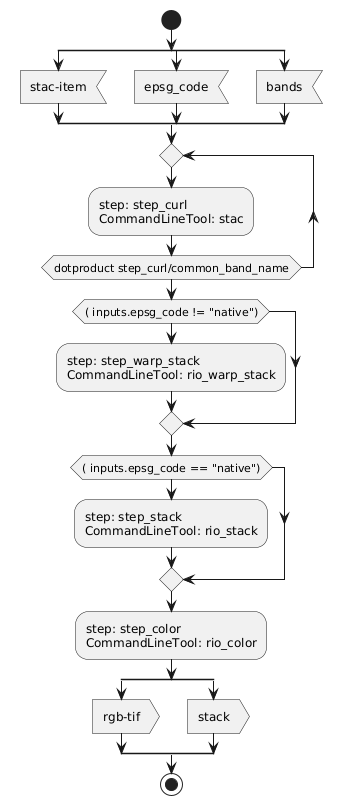

In [12]:
render(DiagramType.ACTIVITY)

### 2.2 Component diagram

The [component](https://plantuml.com/component-diagram) diagram represents the CWL document like chips on a motherboard.

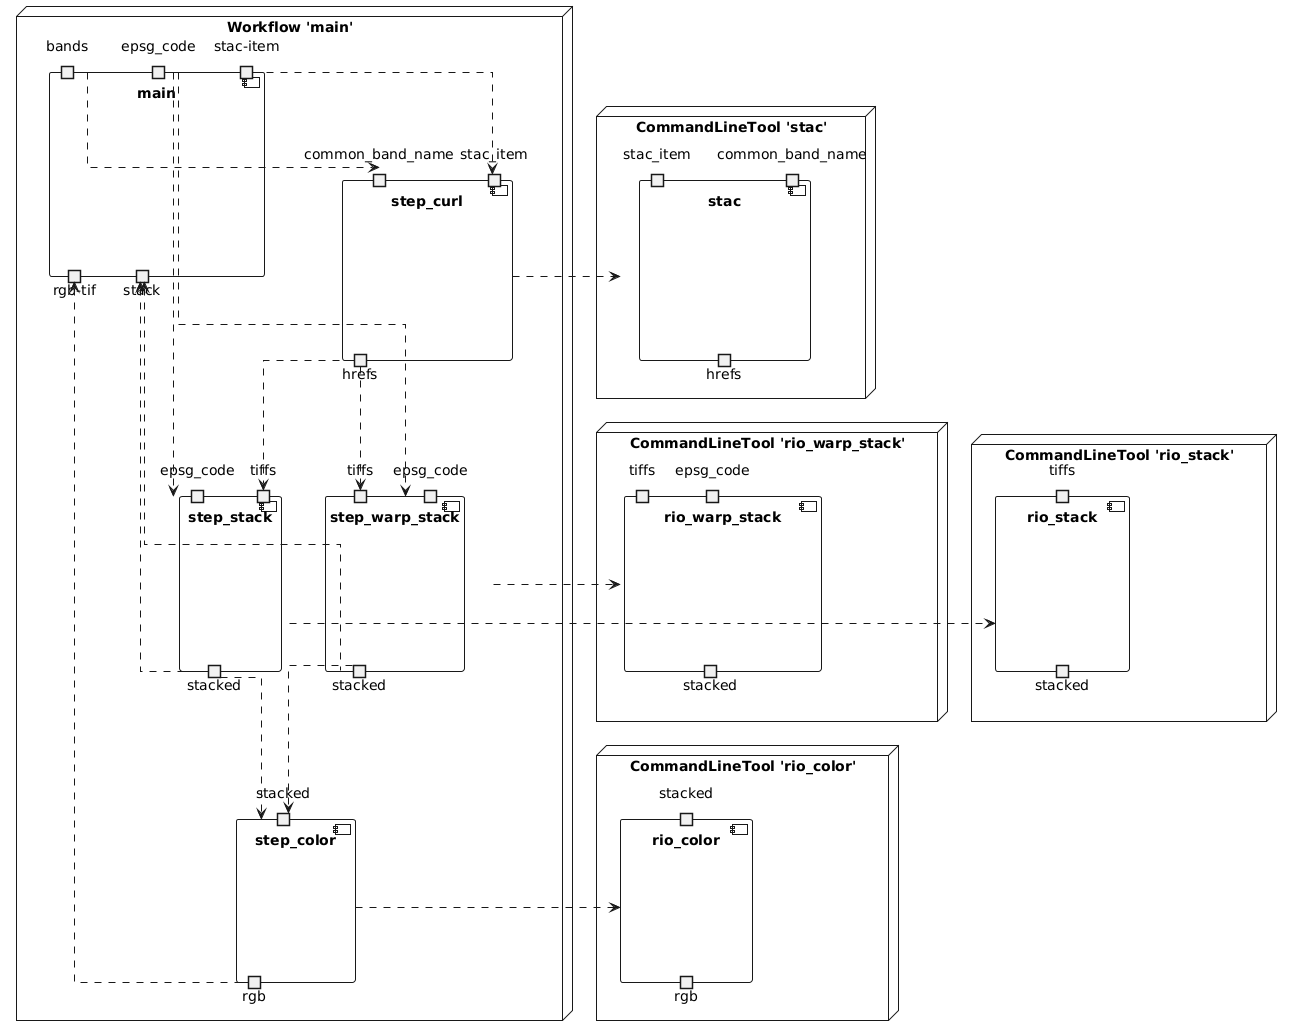

In [13]:
render(DiagramType.COMPONENT)

### 2.3 Class diagram

The [class](https://plantuml.com/class-diagram) diagram represents the CWL document like specifications of the previously illustrated chips on a motherboard.

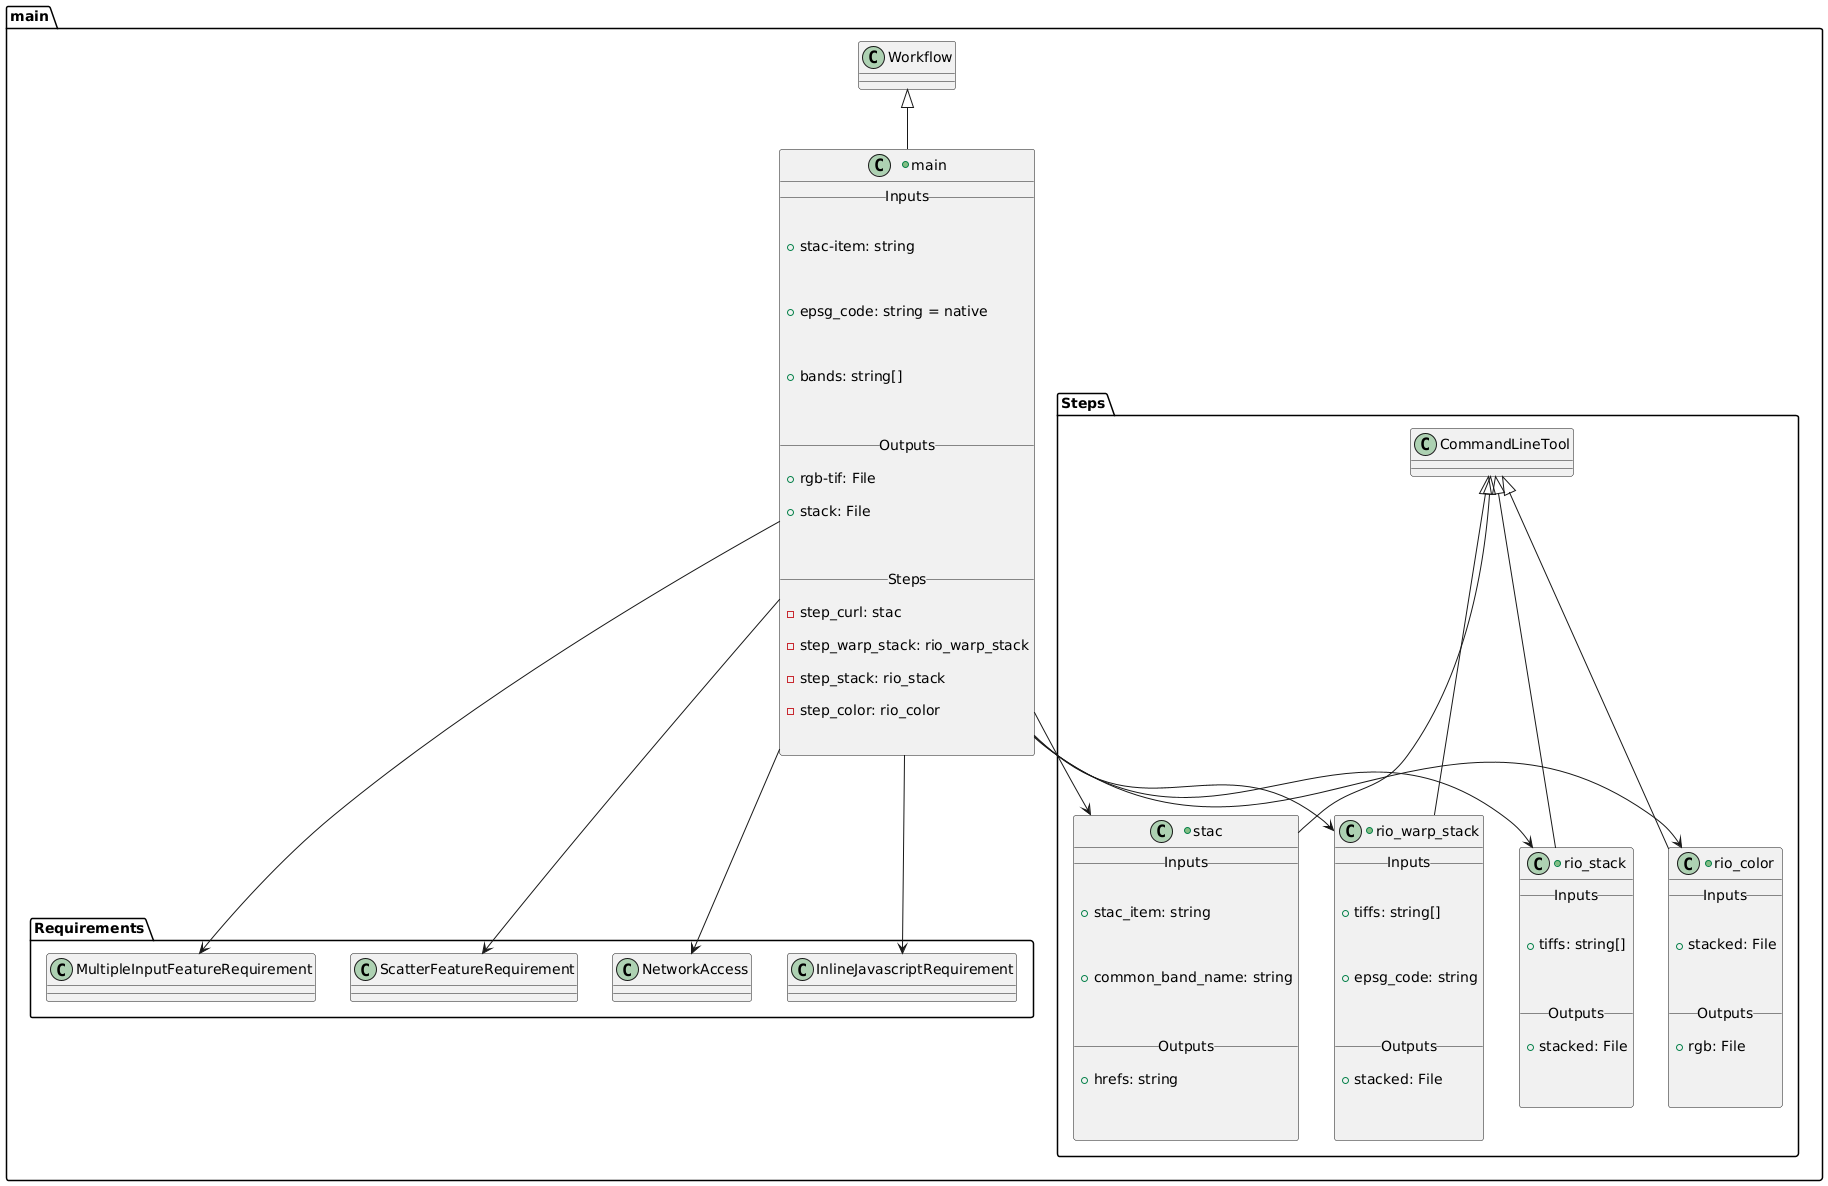

In [14]:
render(DiagramType.CLASS)

### 2.4 Sequence diagram

The [sequence](https://plantuml.com/sequence-diagram) diagram represents how the previously illustrated chips on a motherboard are triggered and interact with each other.

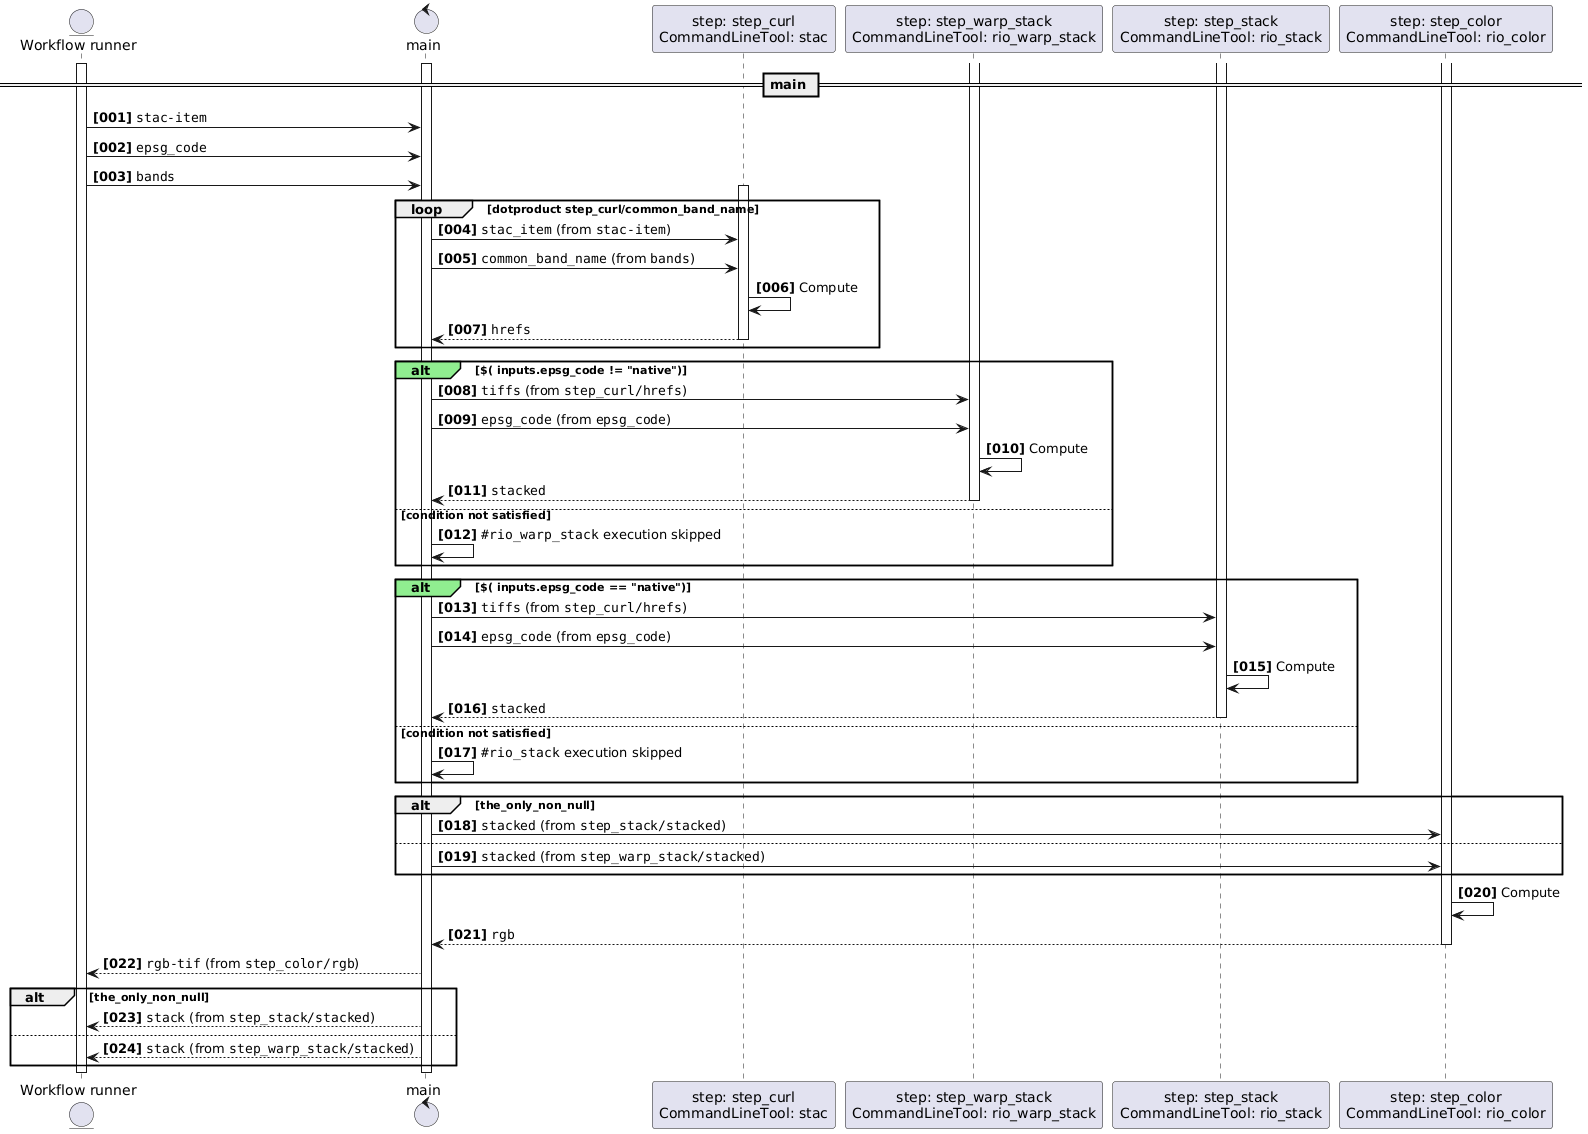

In [15]:
render(DiagramType.SEQUENCE)

### 2.5 State diagram

The [state](https://plantuml.com/state-diagram) diagram represents the dependencies between the inputs/outputs of the previously illustrated chips on a motherboard.

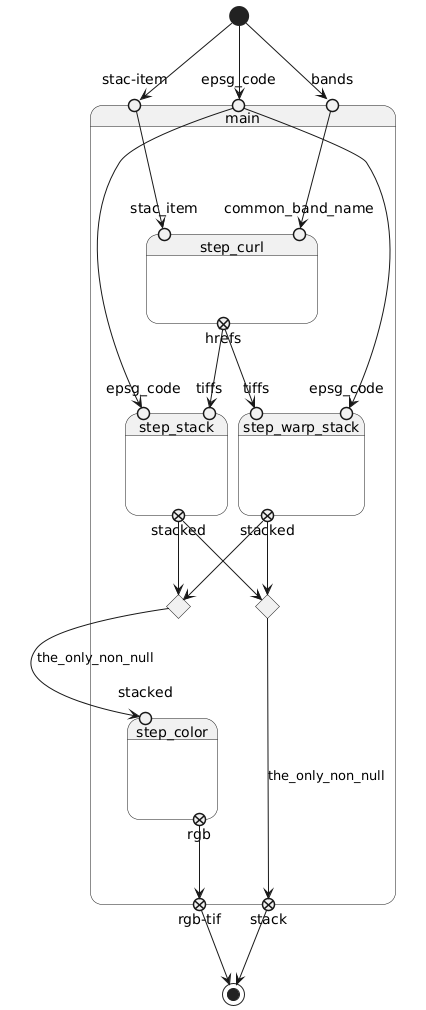

In [16]:
render(DiagramType.STATE)